<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/HW7/hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-surprise

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from surprise import accuracy, Dataset, Reader, SVD, SVDpp, NMF
from surprise.model_selection import cross_validate, train_test_split
from surprise import Dataset
from sklearn.metrics.pairwise import cosine_similarity

from scipy.io import loadmat
from scipy.optimize import minimize

In [2]:
data = Dataset.load_builtin('ml-100k', prompt=True)

NameError: name 'Dataset' is not defined

In [ ]:
data

In [ ]:
# Отримуємо список рейтингів у вигляді списку кортежів (user, item, rating)
raw_ratings = data.raw_ratings

# Створюємо DataFrame
df = pd.DataFrame(raw_ratings, columns=["user_id", "item_id", "rating", "timestamp"])

# Виводимо перші 5 рядків
print(df.head())

  user_id item_id  rating  timestamp
0     196     242     3.0  881250949
1     186     302     3.0  891717742
2      22     377     1.0  878887116
3     244      51     2.0  880606923
4     166     346     1.0  886397596


---
# Використання алгоритму SVD
---

In [ ]:
algo = SVD()

# Run 5-fold cross-validation and print results
result_svd = cross_validate(algo, data, measures=["RMSE", "MAE"], cv=5, verbose=True)
result_svd = pd.DataFrame.from_dict(result_svd).mean(axis=0)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9386  0.9330  0.9309  0.9365  0.9340  0.9346  0.0027  
MAE (testset)     0.7371  0.7363  0.7366  0.7386  0.7361  0.7369  0.0009  
Fit time          2.20    1.37    1.40    1.35    1.34    1.53    0.34    
Test time         0.11    0.25    0.11    0.23    0.11    0.16    0.06    


---
# Використання алгоритму SVD++
---

In [ ]:
algoSVDpp = SVDpp()

resultSVDpp = cross_validate(algoSVDpp, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
resultSVDpp = pd.DataFrame.from_dict(resultSVDpp).mean(axis=0)

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9225  0.9218  0.9171  0.9254  0.9173  0.9208  0.0032  
MAE (testset)     0.7207  0.7236  0.7175  0.7251  0.7218  0.7217  0.0026  
Fit time          28.44   26.84   27.55   27.11   27.03   27.39   0.57    
Test time         4.50    5.44    4.57    5.37    4.42    4.86    0.45    


---
# Використання алгоритму NMF
---

In [ ]:
algoNMF = NMF()

resultNMF = cross_validate(algoNMF, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
resultNMF = pd.DataFrame.from_dict(resultNMF).mean(axis=0)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9639  0.9669  0.9677  0.9635  0.9649  0.9654  0.0017  
MAE (testset)     0.7559  0.7614  0.7628  0.7602  0.7566  0.7594  0.0027  
Fit time          2.83    2.14    2.10    2.12    2.12    2.26    0.28    
Test time         0.21    0.09    0.25    0.09    0.32    0.19    0.09    


---
# Підсумки
---

In [ ]:
agg_results = pd.DataFrame({
    "SVD": result_svd,
    "SVD++": resultSVDpp,
    "NMF": resultNMF
})

print(agg_results.round(2))


            SVD  SVD++   NMF
test_rmse  0.93   0.92  0.97
test_mae   0.74   0.72  0.76
fit_time   1.53  27.39  2.26
test_time  0.16   4.86  0.19


# **Висновки**

<u>Якщо потрібна найкраща точність:</u> **→ SVD++**

✅ Найменші похибки (RMSE = 0.9206, MAE = 0.7221)

❌ Дуже повільне навчання (25.89 секунд) і тестування (4.55 секунд).


<u>Якщо потрібна швидкість і висока точність:</u> **→ SVD**

✅ Достатньо точний (RMSE = 0.9358, MAE = 0.7383)

✅ Швидке навчання (1.25 секунди) та тестування (0.15 секунди).

<u>Якщо точність не критична, але важлива інтерпретація:</u> **→ NMF**

✅ Модель легко інтерпретувати, оскільки базується на матричному розкладі.

❌ Найгірша точність (RMSE = 0.9648, MAE = 0.7585).

**Рекомендація**

Якщо ресурсів обмежено, виберіть SVD — він достатньо точний і швидкий.

Якщо найвища точність критична, використовуйте SVD++, але готуйтеся до довгого навчання.

NMF підходить лише, якщо потрібна зрозуміла модель, але вона менш точна.

---
# Тест передбачення
---

In [ ]:
# Приклад: передбачення рейтингу для користувача '196' та фільму '242'
user_id = '196'
item_id = '242'

# Викликаємо метод predict() для отримання прогнозу
prediction = algo.predict(user_id, item_id)

# Виводимо передбачений рейтинг
print(f"Передбачений рейтинг для користувача {user_id} та фільму {item_id} - SVD: {prediction.est:.4f}")


# Для SVD++
prediction_svdpp = algoSVDpp.predict(user_id, item_id)
print(f"SVD++: Передбачений рейтинг: {prediction_svdpp.est:.4f}")

# Для NMF
prediction_nmf = algoNMF.predict(user_id, item_id)
print(f"NMF: Передбачений рейтинг: {prediction_nmf.est:.4f}")


# Фільтруємо DataFrame за користувачем і фільмом
actual_rating = df[(df["user_id"] == user_id) & (df["item_id"] == item_id)]

# Якщо запис знайдено, виводимо реальний рейтинг
if not actual_rating.empty:
    print(f"Реальний рейтинг користувача {user_id} для фільму {item_id}: {actual_rating['rating'].values[0]}")
else:
    print(f"Користувач {user_id} не оцінював фільм {item_id}")

Передбачений рейтинг для користувача 196 та фільму 242 - SVD: 4.1931
SVD++: Передбачений рейтинг: 3.9211
NMF: Передбачений рейтинг: 3.6377
Реальний рейтинг користувача 196 для фільму 242: 3.0


In [ ]:
# Зробимо для кількох семплів:
# Список пар (user_id, item_id) для перевірки
samples = [("196", "242"), ("186", "302"), ("22", "377"), ("244", "51"), ("166", "346")]

print("Передбачення рейтингів різними алгоритмами:\n")

for user_id, item_id in samples:
    # Отримуємо передбачення кожним з алгоритмів
    pred_svd = algo.predict(user_id, item_id)
    pred_svdpp = algoSVDpp.predict(user_id, item_id)
    pred_nmf = algoNMF.predict(user_id, item_id)

    # Отримуємо реальний рейтинг (якщо є)
    actual = df[(df["user_id"] == user_id) & (df["item_id"] == item_id)]
    actual_rating = actual["rating"].values[0] if not actual.empty else "немає"

    # Виводимо результати
    print(f"Користувач {user_id}, Фільм {item_id}:")
    print(f"  ✅ Реальний рейтинг: {actual_rating}")
    print(f"  🔵 SVD      : {pred_svd.est:.3f}")
    print(f"  🟢 SVD++    : {pred_svdpp.est:.3f}")
    print(f"  🟣 NMF      : {pred_nmf.est:.3f}")
    print("-" * 50)

---
# **Додаткове завдання 🌟**
---

Алгоритм колабораційної фільтрації

In [ ]:
from pathlib import Path
import os

# URL для завантаження файлу movie_ids.txt
movie_ids_txt_url = 'https://drive.google.com/uc?id=12XeO4KXQfbvvTdLFbkYA-BeXzhlNnnuo&export=download'

# Визначаємо шлях для файлів
output_ids = Path("/content/movie_ids.txt")

# Завантаження movie_ids.txt, якщо його немає
if not output_ids.is_file():
    !wget -q -O {output_ids} {movie_ids_txt_url}


In [ ]:
from google.colab import files
files.upload()

Saving movies.mat to movies.mat


{'movies.mat': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Dec  1 17:19:26 2011                                                \x00\x01IM\x0f\x00\x00\x00\xd6\xf7\x01\x00x\x9c\xec\x99QN\x031\x0cD\xd7\x1e\x1b\xf1\xc5w\xef\x01\x97\xe1Z\\\x84\x9bp&f\x9c\xb4\xdd\x16P\xbb\xaa\x04\x95\xf0\xab\xb6\xbbql\xaf\xd3\x8fX\xd3<-\xe4e\xb7<\xf0\xf6\xc8Kw\x91s\xfcF\xc3;\x96\xc5\xf8y\xe5\xd8y}<\xef\x96D\x00\x19\x96\xf0\x14\x08\x0e"h\xf50\xcd\xb8\xb9k\x94\x91\x19\x91\xb4T@\re\x95+x1H\x81\xca\x80\xacy\xa4G\x8d\xdc\xcd\\S\xc6\x0f\x1d\x18o\x0c\xcbJZ\x81t2\x18\xdc\xc2\x99\xd4g0\x13\x8f\xb9\x1c\xb5\r\xc6\xdb\xa3\xca\xd0]\xb6Q\x12\xaaD(\x07\xbdL\xa6t-\x88+a)\xa1\x8c\x91\\O\xd6;ySUf|5\x17\xabD\x8e\xa5i\x9a\xa6\xf9#b\xff\xc0\x16\x155\xc0\xa9\xfd\x9c\xdc\xfc\x8aU\xc4y\xd6\xed\xc9n!N^\x99e\t\x9c\xcc\xb3\xb7\xcd&\xab\x9e\xaa^\xab\xae\xa8\xfe\xa9\xe68\xa7L\r\xd3\xecw\x8bo\x9a\xa6i\xee\x90\x1f\xbb\xe5\x95\xd8z\xe0\x95N\x92\x91\xbd\t~\xe6\xea\xc7o\xce\x95\x84:\xb60\xa7\xcc\xa2\xd0\xa3\x8a,\x01f\x0e\xea-\x

In [ ]:
!ls -l /content


total 276
-rw-r--r-- 1 root root  48444 Apr 13  2023 movie_ids.txt
-rw-r--r-- 1 root root 223396 Mar  4 20:08 movies.mat
-rw-r--r-- 1 root root   2370 Mar  4 19:24 movies.mat.zip
-rw-r--r-- 1 root root      0 Mar  4 19:33 {output_ids}
drwxr-xr-x 1 root root   4096 Mar  3 14:19 sample_data


In [ ]:
def loadMovieList():
    with open('movie_ids.txt', encoding='ISO-8859-1') as fid:
        return [' '.join(line.split()[1:]).strip() for line in fid]

## Рекомендаційні системи

In this part of the exercise, you will implement the collaborative filtering learning algorithm and apply it to a dataset of movie ratings ([MovieLens 100k Dataset](https://grouplens.org/datasets/movielens/) from GroupLens Research). This dataset consists of ratings on a scale of 1 to 5. The dataset has $n_u = 943$ users, and $n_m = 1682$ movies.

In the next parts of this exercise, you will implement the function `cofiCostFunc` that computes the collaborative filtering objective function and gradient. After implementing the cost function and gradient, you will use `scipy.optimize.minimize` to learn the parameters for collaborative filtering.

### 2.1 Movie ratings dataset

The next cell will load the dataset `movies.mat`, providing the variables `Y` and `R`.
The matrix `Y` (a `num_movies` $\times$ `num_users` matrix) stores the ratings $y^{(i,j)}$ (from 1 to 5). The matrix `R` is an binary-valued indicator matrix, where $R(i, j) = 1$ if user $j$ gave a rating to movie $i$, and $R(i, j) = 0$ otherwise. The objective of collaborative filtering is to predict movie ratings for the movies that users have not yet rated, that is, the entries with $R(i, j) = 0$. This will allow us to recommend the movies with the highest predicted ratings to the user.

To help you understand the matrix `Y`, the following cell will compute the average movie rating for the first movie (Toy Story) and print its average rating.

In [ ]:
names = loadMovieList()
print("Number of movies:", len(names))
names[:4]

Number of movies: 1682


['Toy Story (1995)',
 'GoldenEye (1995)',
 'Four Rooms (1995)',
 'Get Shorty (1995)']

In [ ]:
data = loadmat('movies.mat')
# Перевіряємо, що міститься в data
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Y', 'R'])


Average rating for movie 1601 ( Office Killer (1997) ): 0.000000 / 5


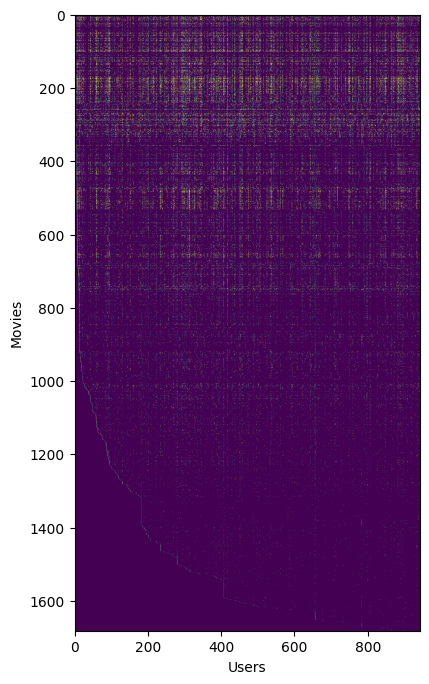

In [ ]:
Y, R = data['Y'], data['R']

# Y is a 1682x943 matrix, containing ratings (1-5) of
# 1682 movies on 943 users

# R is a 1682x943 matrix, where R(i,j) = 1
# if and only if user j gave a rating to movie i

# From the matrix, we can compute statistics like average rating.
print('Average rating for movie 1601 (',names[1600] ,'): %f / 5' %
      np.mean(Y[1600, R[0, :]]))

# We can "visualize" the ratings matrix by plotting it with imshow
plt.figure(figsize=(8, 8))
plt.imshow(Y)
plt.ylabel('Movies')
plt.xlabel('Users')
plt.grid(False)

In [ ]:
def average_ratings(Y, R):
    """
    Обчислює середній рейтинг для кожного фільму, уникаючи ділення на нуль.

    Args:
    Y (np.ndarray): Матриця рейтингів (m, n)
    R (np.ndarray): Матриця наявності рейтингів (m, n)

    Returns:
    np.ndarray: Вектор середніх рейтингів (m, 1)
    """
    sum_ratings = np.sum(Y * R, axis=1)  # Враховуємо лише наявні оцінки
    count_ratings = np.sum(R, axis=1)

    # Уникнення ділення на нуль (якщо count_ratings[i] == 0, ставимо середній рейтинг 0)
    avg_ratings = np.divide(sum_ratings, count_ratings, where=(count_ratings != 0))

    return avg_ratings

In [ ]:
avg_ratings = average_ratings(Y, R)

# Виведення перших 10 середніх рейтингів
for i in range(10):
    print(f"Фільм {i+1}: середня оцінка = {avg_ratings[i]}")

Фільм 1: середня оцінка = 3.8783185840707963
Фільм 2: середня оцінка = 3.2061068702290076
Фільм 3: середня оцінка = 3.033333333333333
Фільм 4: середня оцінка = 3.550239234449761
Фільм 5: середня оцінка = 3.302325581395349
Фільм 6: середня оцінка = 3.576923076923077
Фільм 7: середня оцінка = 3.798469387755102
Фільм 8: середня оцінка = 3.9954337899543377
Фільм 9: середня оцінка = 3.8963210702341136
Фільм 10: середня оцінка = 3.831460674157303


---
# Колаборативна фільтрація на основі матриць Y і R
---

In [ ]:
def collaborative_filtering(Y, R):
    """
    Виконує колаборативну фільтрацію для прогнозування рейтингів користувачів.

    Args:
    Y (np.ndarray): Матриця рейтингів (m, n)
    R (np.ndarray): Матриця наявності рейтингів (m, n)

    Returns:
    np.ndarray: Прогнозовані рейтинги (m, n)
    """
    num_users = Y.shape[1]

    # Косинусна подібність між користувачами
    user_similarity = cosine_similarity(Y.T, Y.T)

    # Встановлюємо головну діагональ у 0 (щоб уникнути самоподібності)
    np.fill_diagonal(user_similarity, 0)

    # Нормалізація: усереднюємо оцінки користувачів з урахуванням подібності
    predicted_ratings = np.dot(Y, user_similarity) / np.dot(R, user_similarity + 1e-8)

    return predicted_ratings


In [ ]:
predicted_ratings = collaborative_filtering(Y, R)

In [ ]:
def make_recommendations(predicted_ratings, names, user_id, num_recommendations):
    """
    Генерує рекомендації фільмів для заданого користувача.

    Args:
    predicted_ratings (np.ndarray): Матриця прогнозованих рейтингів (m, n)
    names (list): Список назв фільмів
    user_id (int): Ідентифікатор користувача (1-based)
    num_recommendations (int): Кількість рекомендацій

    Returns:
    list: Список рекомендованих фільмів
    """
    user_idx = user_id - 1  # Корекція для 0-індексації

    # Отримуємо рейтинг користувача
    user_ratings = predicted_ratings[:, user_idx]

    # Відфільтровуємо тільки НЕ оцінені користувачем фільми
    unrated_movies = np.where(predicted_ratings[:, user_idx] != 0)[0]

    # Сортуємо фільми за рейтингом
    sorted_indices = unrated_movies[np.argsort(user_ratings[unrated_movies])[::-1]]

    # Формуємо список рекомендацій
    top_movies = [(idx + 1, names[idx]) for idx in sorted_indices[:num_recommendations]]

    return top_movies


In [ ]:
user_id = 5
num_recommendations = 10
recommendations = make_recommendations(predicted_ratings, names, user_id, num_recommendations)

for position, movie_name in recommendations:
    print(f"Позиція {position}: {movie_name}")

Позиція 814: Great Day in Harlem, A (1994)
Позиція 1122: They Made Me a Criminal (1939)
Позиція 1599: Someone Else's America (1995)
Позиція 1467: Saint of Fort Washington, The (1993)
Позиція 1500: Santa with Muscles (1996)
Позиція 1189: Prefontaine (1997)
Позиція 1536: Aiqing wansui (1994)
Позиція 1201: Marlene Dietrich: Shadow and Light (1996)
Позиція 1656: Little City (1998)
Позиція 1653: Entertaining Angels: The Dorothy Day Story (1996)
